In [117]:
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt                                                                         

# Load dataset


In [118]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

In [119]:
target_labels = ['airplane', 
                 'automobile',
                 'bird',
                 'cat',
                 'deer',
                 'dog',
                 'frog',
                 'horse',
                 'ship',
                 'truck']

# Summarize loaded dataset

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


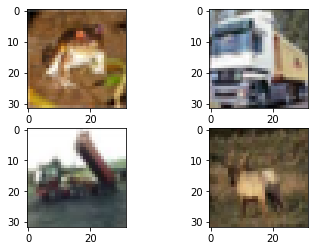

In [120]:
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))
# plot some images
for i in range(4):
	pyplot.subplot(220 + 1 + i)
	pyplot.imshow(train_X[i])
pyplot.show()

# Cnvert to grayscale

In [121]:
import cv2

train_X_grayscale = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_X])
test_X_grayscale = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_X])

Train: X=(50000, 32, 32), y=(50000, 1)
Test: X=(10000, 32, 32), y=(10000, 1)


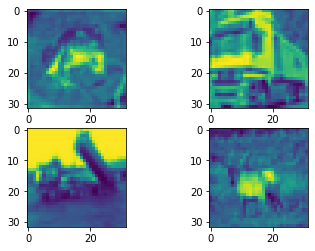

In [122]:
print('Train: X=%s, y=%s' % (train_X_grayscale.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X_grayscale.shape, test_y.shape))
# plot some images
for i in range(4):
	pyplot.subplot(220 + 1 + i)
	pyplot.imshow(train_X_grayscale[i])
pyplot.show()

In [112]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *

In [52]:
train_X = train_X.reshape(np.shape(train_X)[0], -1)
test_X = test_X.reshape(np.shape(test_X)[0], -1)

# one hot y values
train_Y = to_categorical(train_y)
test_Y = to_categorical(test_y)

# Preprocessing

In [53]:
# convert from integers to floats
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# normalize to range 0-1
train_X = train_X / 255.0
test_X = test_X / 255.0

In [54]:
# split training hyperpatameters batch
split = int(train_X.shape[0] * 0.2)
hyperbatch_X = train_X[:split]
hyperbatch_Y = train_Y[:split]
hyperbatch_X.shape

(10000, 3072)

# Define model

In [55]:
# split training hyperpatameters batch for validation
split = int(hyperbatch_X.shape[0] * 0.2)
hyperbatch_X_val = hyperbatch_X[:split]
hyperbatch_Y_val = hyperbatch_Y[:split]

hyperbatch_X = hyperbatch_X[split:]
hyperbatch_Y = hyperbatch_Y[split:]

In [15]:
def choose_hyperparams(nodes_number, activation):
  # define model
  model = Sequential()
  # define layeres
  model.add(Dense(nodes_number, activation=activation, input_dim=hyperbatch_X.shape[1]))

  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  # compile and fit
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
  history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)

  print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
  return history

In [16]:
def draw_acc_loss_plt(history):
  # acc
  plt.plot(history.history['acc'], 'b-')
  plt.plot(history.history['val_acc'], 'r-')
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  # loss
  plt.plot(history.history['loss'], 'b-')
  plt.plot(history.history['val_loss'], 'r-')
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

## First layer's neuron size

### neuron size: 20

loss: 1.6975454092025757, accuracy: 0.414124995470047, val_loss: 1.75731360912323, val_accuracy: 0.3779999911785126



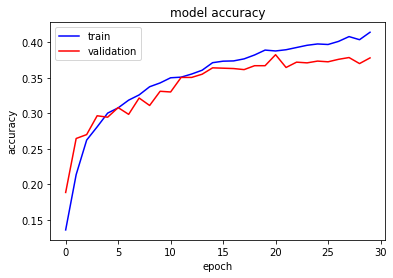

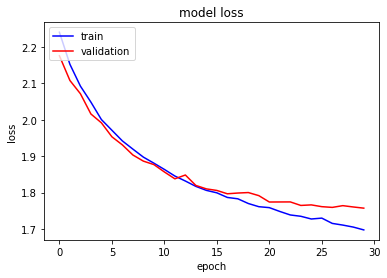

In [17]:
history = choose_hyperparams(20, 'relu')
draw_acc_loss_plt(history)

### neuron size: 200

loss: 1.2782846689224243, accuracy: 0.562375009059906, val_loss: 1.598313570022583, val_accuracy: 0.4334999918937683



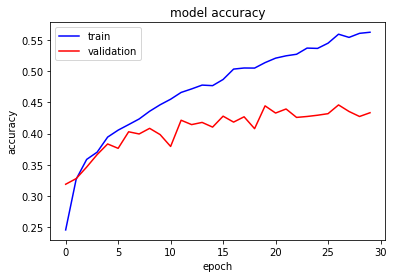

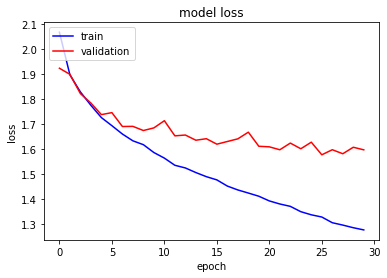

In [18]:
history = choose_hyperparams(200, 'relu')
draw_acc_loss_plt(history)

### neuron size: 1000

loss: 1.0532010793685913, accuracy: 0.6535000205039978, val_loss: 1.6143431663513184, val_accuracy: 0.44449999928474426



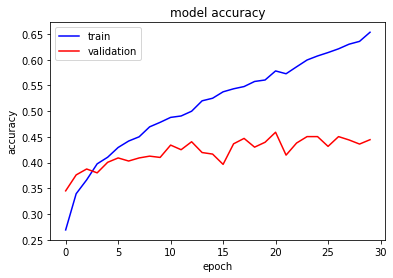

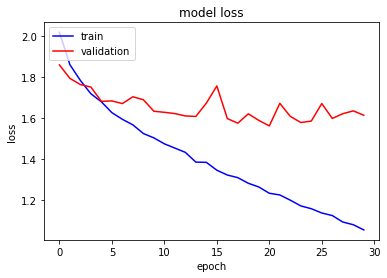

In [19]:
history = choose_hyperparams(1000, 'relu')
draw_acc_loss_plt(history)

### neuron size: 2000

loss: 0.9575773477554321, accuracy: 0.6832500100135803, val_loss: 1.5993822813034058, val_accuracy: 0.44999998807907104



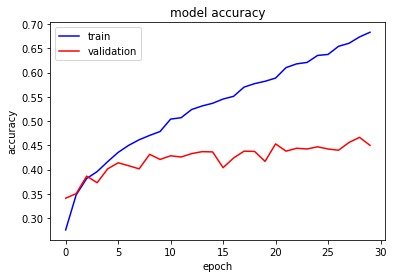

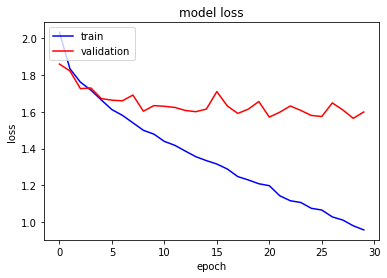

In [20]:
history = choose_hyperparams(2000, 'relu')
draw_acc_loss_plt(history)

### از آنجایی که تفاوت فاحشی بین دقت و لاس در زمانی که تعداد نورون ها 200 عدد بود با زمانی که تعداد آنها 2000 تا بود وجود نداشت پس مقدار 200 را که کمتر است انتخاب می کنیم.

## Activation function

### Activation function: elu

loss: 1.299027442932129, accuracy: 0.5506250262260437, val_loss: 1.6699886322021484, val_accuracy: 0.4099999964237213



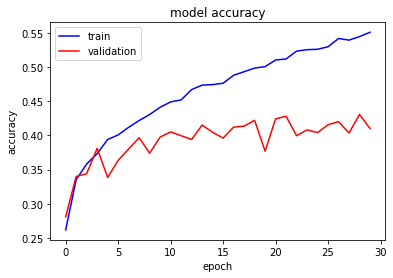

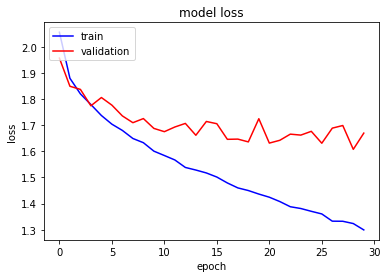

In [21]:
history = choose_hyperparams(200, 'elu')
draw_acc_loss_plt(history)

### از آنجایی که دقت نسبت به زمانی که از تابع رِلو استفاده کرده بودیم کاهش یافته است پس همان تابع رِلو را برای ادامه انتخاب می کنیم.

## Optimazers

### Optimazer: Adam

loss: 1.2878727912902832, accuracy: 0.5631250143051147, val_loss: 1.6036509275436401, val_accuracy: 0.4325000047683716



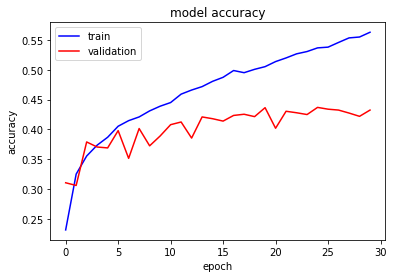

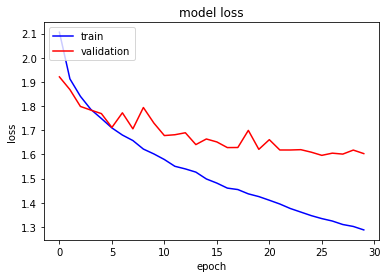

In [23]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

### Optimizer: Nadam

loss: 1.2414971590042114, accuracy: 0.5788750052452087, val_loss: 1.6269986629486084, val_accuracy: 0.4375



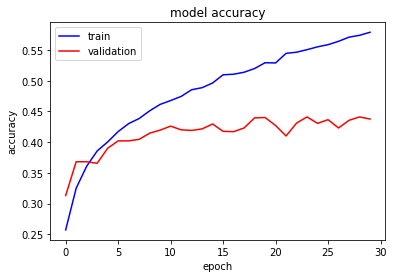

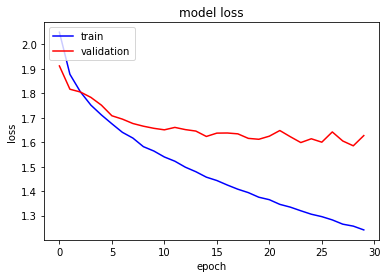

In [26]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Nadam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

### Optimizer: RMSprop

loss: 1.2984145879745483, accuracy: 0.5521249771118164, val_loss: 1.6545289754867554, val_accuracy: 0.43650001287460327



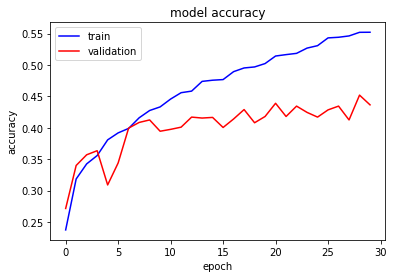

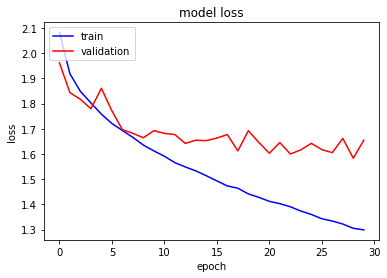

In [27]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

### همانطور که مشخص است تفاوت چندان زیادی بین نتایج سه اپتیمایزر مختلف وجود ندارد و در نتیجه به دلیل معروفیت و استفاده‌ی معمول‌تر ما نیز آدام را انتخاب می‌کنیم. 

## Learning rate

## Learning rate: 0.01

loss: 1.4542129039764404, accuracy: 0.4805000126361847, val_loss: 1.7202320098876953, val_accuracy: 0.40299999713897705



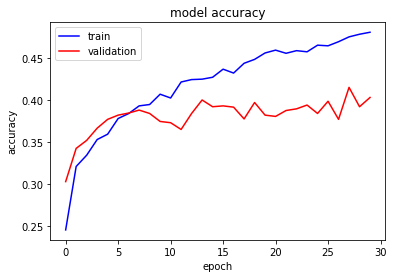

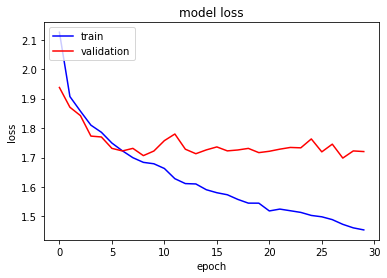

In [29]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

## Learning rate: 0.001

loss: 1.3701391220092773, accuracy: 0.515999972820282, val_loss: 1.6842576265335083, val_accuracy: 0.4169999957084656



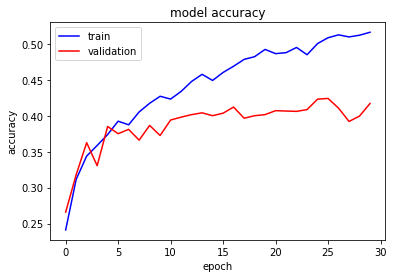

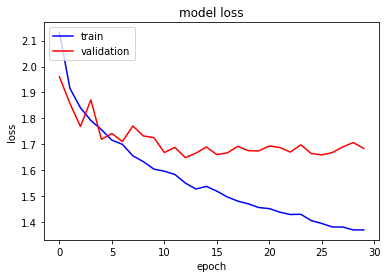

In [30]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

## Learning rate: 0.0001

loss: 1.3077545166015625, accuracy: 0.5525000095367432, val_loss: 1.576960563659668, val_accuracy: 0.44850000739097595



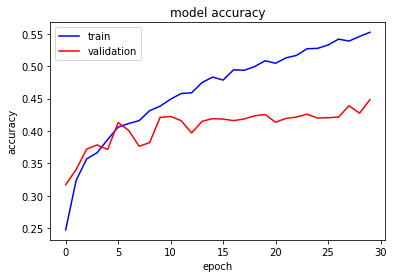

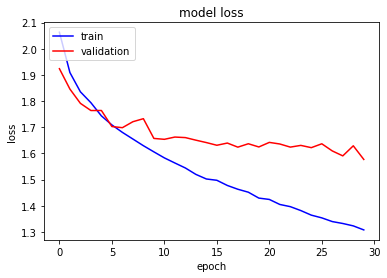

In [33]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

### بعد از بررسی دقت‌ها و لاس‌ها می‌توان نتیجه گرفت که مقدار 0.0001 بهترین مقدار برای نرخ یادگیری است.

## Layer size and count

loss: 0.8509207367897034, accuracy: 0.7006250023841858, val_loss: 1.702639102935791, val_accuracy: 0.4560000002384186



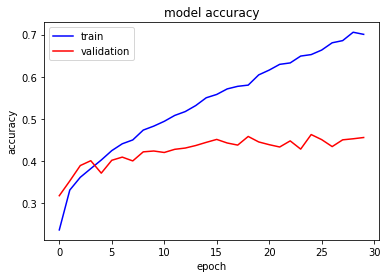

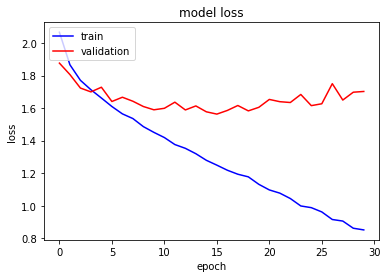

In [41]:
# define model
model = Sequential()
# define layeres
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

 بعد از بررسی تعداد لایه‌های مختلف و تعداد نودهای متنوع برای هر لایه، به ترکیب بالا رسیدم که به دلیل وجود تعداد بسیار زیاد حالت‌های مختلف، تنها حالت نهایی را قرار دادم.

## Epochs and batch size number

### Epochs = 60

loss: 0.3126028776168823, accuracy: 0.8987500071525574, val_loss: 2.4268734455108643, val_accuracy: 0.4544999897480011



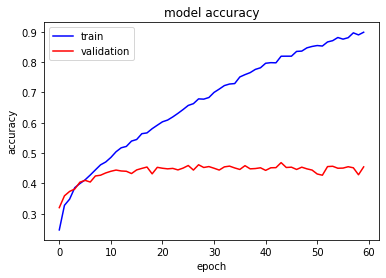

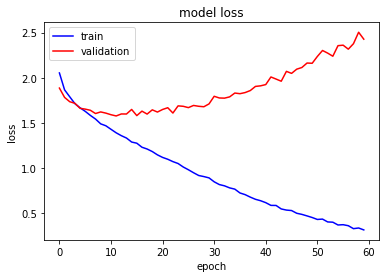

In [42]:
# define model
model = Sequential()
# define layeres
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=60, validation_data=(hyperbatch_X_val, hyperbatch_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

In [43]:
# evaluate model
_, acc = model.evaluate(test_X, test_Y, verbose=0)
acc

0.4489000141620636

### همانطور که مشخص است با تعداد 60 ایپاک مدل دچار اورفیت می‌شود و تنها دقت ترِین افزایش یافته و دقت ولیدیشن ثابت می‌ماند. با تعداد ایپاک کمتر از 30 نیز مدل آندرفیت می‌شود. به همین خاطر تعداد 30 را انتخاب می‌کنیم. برای اندازه‌ی بچ نیز مقادیر مختلفی انتخاب و تست شد که در نهایت مقدار 32 بهترین نتیجه را ارائه داد که به دلیل تعداد بالای حالت همه‌ی آنها ذکر نشد.

# Train all 5 batches

In [56]:
# split training batch for validation
split = int(train_X.shape[0] * 0.2)
train_X_val = train_X[:split]
train_Y_val = train_Y[:split]

train_X = train_X[split:]
train_Y = train_Y[split:]
train_X.shape

(40000, 3072)

## Static

loss: 0.7839669585227966, accuracy: 0.7216249704360962, val_loss: 1.4813337326049805, val_accuracy: 0.527899980545044



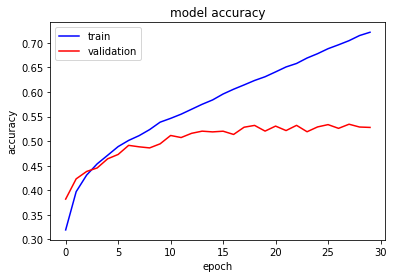

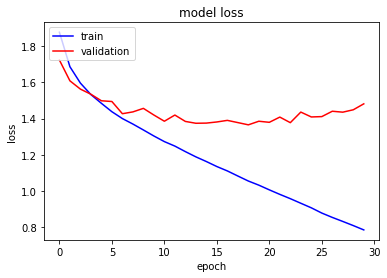

In [62]:
# define model
model = Sequential()
# define layeres
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(train_X, train_Y, batch_size=32, epochs=30, validation_data=(train_X_val, train_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)

In [63]:
# evaluate model
_, acc = model.evaluate(test_X, test_Y, verbose=0)
acc

0.5217000246047974

## Dynamic using k-fold cross validation with k=5

In [64]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=5, random_state=1, shuffle=True)

In [65]:
# define model
model = Sequential()
# define layeres
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.05)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

train_acc_score = []
test_acc_score = []
_k = 5

# k-fold cross validation
for train_index , test_index in kf.split(train_X):
    X_train , X_test = train_X[train_index,:], train_X[test_index,:]
    y_train , y_test = train_Y[train_index] , train_Y[test_index]
    
    history = model.fit(X_train, y_train, batch_size=32, epochs=10)

    pred_train_values = np.argmax(model.predict(X_train), axis=1)
    pred_test_values = np.argmax(model.predict(X_test), axis=1)

    y_train_arg = np.argmax(y_train, axis=1)
    y_test_arg = np.argmax(y_test, axis=1)

    train_acc = accuracy_score(pred_train_values , y_train_arg)
    test_acc = accuracy_score(pred_test_values , y_test_arg)
    
    print('train accuracy: {}'.format(train_acc))
    print('test accuracy: {}'.format(test_acc))
    train_acc_score.append(train_acc)
    test_acc_score.append(test_acc)
    
train_avg_acc_score = sum(train_acc_score)/_k
test_avg_acc_score = sum(test_acc_score)/_k

Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8975 - acc: 0.3082
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7052 - acc: 0.3879
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6241 - acc: 0.4198
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.5646 - acc: 0.4427
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.5101 - acc: 0.4594
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.4710 - acc: 0.4763
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.4391 - acc: 0.4869
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.4029 - acc: 0.5004
Epoch 9/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.3702 - acc: 0.5107
Epoch 10/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.3414 - acc: 0.5270
0.5254375
0.45975
Epoch 1/10


In [66]:
# evaluate model
_, acc = model.evaluate(test_X, test_Y, verbose=0)
acc

0.5199999809265137

### همانطور که مشاهده می‌شود کا فولد کراس ولیدیشن نیز دقتی برابر با حالت ایستا داده است و تفاوت چندانی بین آنها وجود ندارد.

## Confusion matrix

[[582  50  58  24  45  21  11  34  97  46]
 [ 24 634  15  17   8  12  15  17  63 149]
 [ 99  16 492 122 202 136 116  87  22  26]
 [ 27  24  93 362  67 218  89  61  40  33]
 [ 40   8 109  63 396  64 106  83  24  21]
 [ 23  22  66 204  57 379  59  54  24  19]
 [ 23  17  82  94 100  62 561  21  10  30]
 [ 20  24  45  49  77  61  18 581  15  41]
 [106  51  19  25  26  18  11  16 643  65]
 [ 56 154  21  40  22  29  14  46  62 570]]


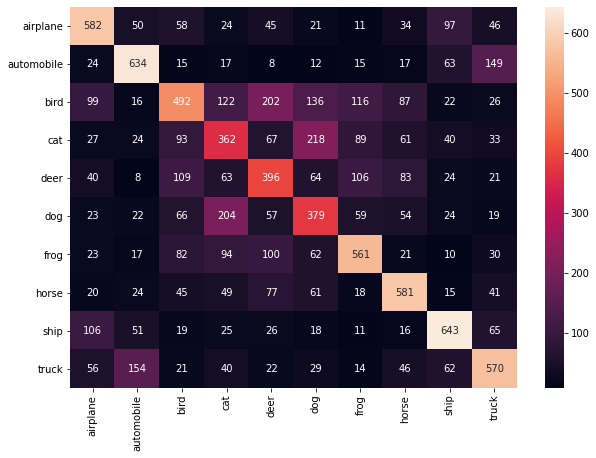

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn


pred_test_values = np.argmax(model.predict(test_X), axis=1)
y_test_arg = np.argmax(test_Y, axis=1)

cm = confusion_matrix(pred_test_values, y_test_arg)
print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in target_labels],
                  columns = [i for i in target_labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')

## Accuracy, precision, recall, F1 Score

In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test_arg, pred_test_values, target_names=target_labels, digits=4))

              precision    recall  f1-score   support

    airplane     0.6012    0.5820    0.5915      1000
  automobile     0.6646    0.6340    0.6489      1000
        bird     0.3733    0.4920    0.4245      1000
         cat     0.3570    0.3620    0.3595      1000
        deer     0.4333    0.3960    0.4138      1000
         dog     0.4179    0.3790    0.3975      1000
        frog     0.5610    0.5610    0.5610      1000
       horse     0.6241    0.5810    0.6018      1000
        ship     0.6561    0.6430    0.6495      1000
       truck     0.5621    0.5700    0.5660      1000

    accuracy                         0.5200     10000
   macro avg     0.5251    0.5200    0.5214     10000
weighted avg     0.5251    0.5200    0.5214     10000



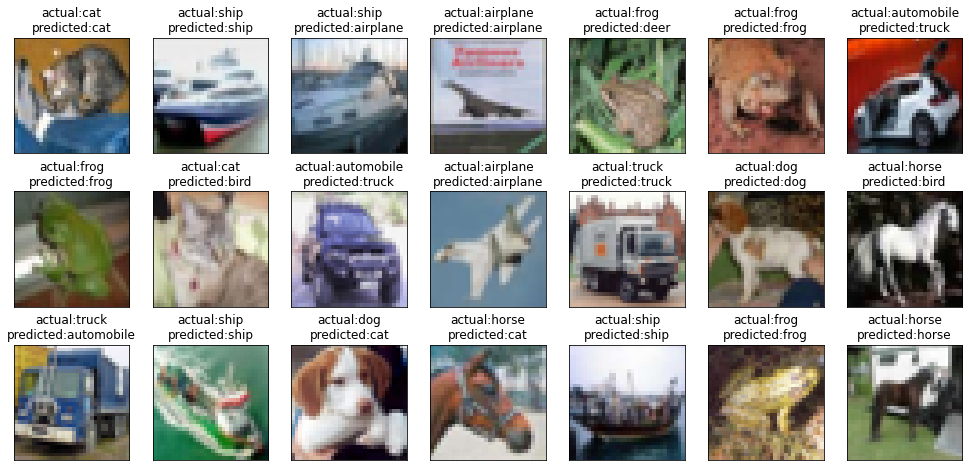

In [96]:
pred_test_values = pred_test_values.astype(int)
y_test_arg = y_test_arg.astype(int)
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + target_labels[y_test_arg[index]] + '\n' 
                            + 'predicted:' + target_labels[pred_test_values[index]])
        axes[i,j].imshow(test_X[index].reshape(32, 32, 3), cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

## Grayscale

In [123]:
# split grayscale training batch for validation
split = int(train_X_grayscale.shape[0] * 0.2)
train_X_grayscale_val = train_X_grayscale[:split]
train_X_grayscale_val = train_X_grayscale_val.reshape(np.shape(train_X_grayscale_val)[0], -1)

train_X_grayscale = train_X_grayscale[split:]
train_X_grayscale = train_X_grayscale.reshape(np.shape(train_X_grayscale)[0], -1)
train_X_grayscale.shape
print(train_X_grayscale_val.shape)

(10000, 1024)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [126]:
print(train_Y_val.shape)
print(train_X_grayscale.shape)
print(train_Y.shape)


(10000, 10)
(40000, 1024)
(40000, 10)


loss: 28.906782150268555, accuracy: 0.1839749962091446, val_loss: 28.928359985351562, val_accuracy: 0.1818999946117401



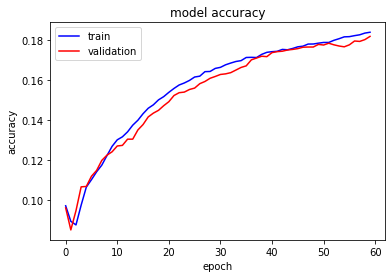

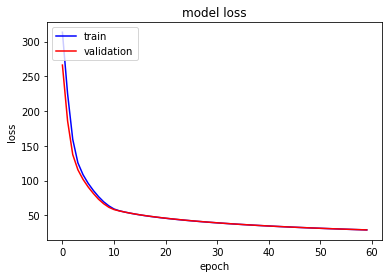

In [135]:
# define model
model = Sequential()
# define layeres
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_dim=train_X_grayscale.shape[1]))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(train_X_grayscale, train_Y, batch_size=64, epochs=60, validation_data=(train_X_grayscale_val, train_Y_val), verbose=0)
# print accuracy and loss
print('loss: {}, accuracy: {}, val_loss: {}, val_accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1], history.history['val_loss'][-1], history.history['val_acc'][-1]))
draw_acc_loss_plt(history)